<a href="https://colab.research.google.com/github/brianhphillips/testrepo/blob/main/GDPPerCapita_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import kagglehub
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
import os

In [3]:
# Step 1: Download dataset
path = kagglehub.dataset_download("georgejdinicola/world-bank-indicators")
print("Path to dataset files:", path)

100%|██████████| 9.46M/9.46M [00:00<00:00, 124MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/georgejdinicola/world-bank-indicators/versions/4


In [5]:
# Step 2: Load data
# Adjust filename if needed (based on actual file inside the downloaded folder)
file_path = os.path.join(path, "world_bank_indicators.csv")  # replace with the actual file name
df = pd.read_csv(file_path)

In [6]:
# Step 3: Inspect and clean data
print("Initial shape:", df.shape)
df = df.dropna(thresh=int(0.8 * df.shape[1]))  # Drop rows with >20% missing
df = df.dropna(axis=1, thresh=int(0.8 * df.shape[0]))  # Drop columns with >20% missing

Initial shape: (16960, 215)


In [7]:
# Step 4: Define target and features
# Replace with the actual column name for GDP per capita
target_column = "GDP per capita (current US$)"  # adjust if needed
if target_column not in df.columns:
    raise ValueError(f"Target column '{target_column}' not found in dataset.")

X = df.drop(columns=[target_column])
y = df[target_column]

In [8]:
# Step 5: Handle categorical and missing data
# Drop non-numeric columns (like country names or codes) or encode them if needed
X = X.select_dtypes(include=[np.number])
X = X.fillna(X.mean())

In [9]:
# Step 6: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Step 7: Train XGBoost model
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [11]:
# Step 8: Evaluate model
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

RMSE: 970.73
R² Score: 0.9617


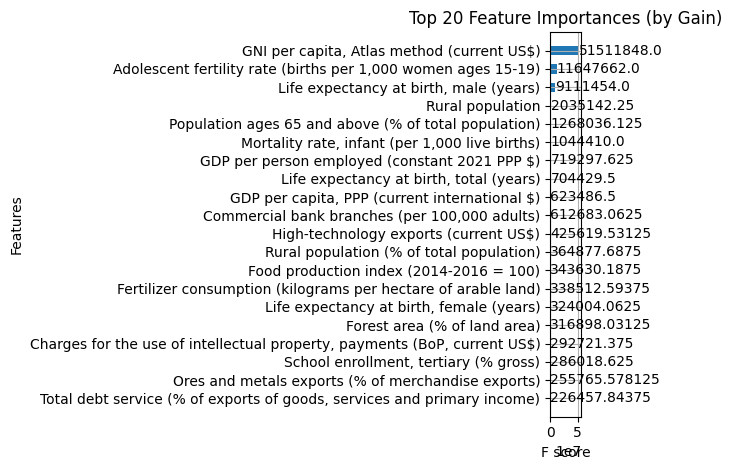

In [12]:
import matplotlib.pyplot as plt
import xgboost as xgb

# Step 9: Plot feature importance
xgb.plot_importance(model, max_num_features=20, importance_type='gain', height=0.5)
plt.title("Top 20 Feature Importances (by Gain)")
plt.tight_layout()
plt.show()